<a href="https://colab.research.google.com/github/sonyajm2/MidwestClimateAnalysis.ipynb/blob/main/HistCMIP_ATMS202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install required dependencies


In [ ]:
!pip install --upgrade xarray zarr gcsfs cftime nc-time-axis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2


In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 27.4 MB/s eta 0:00:00


## Import required packages

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Read CMIP6 data

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')  # Read into pandas DataFrame
df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
523769,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523770,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523771,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523772,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


In [ ]:
# Get monthly surface temperature data from CMIP historical runs
df_ta = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'tas' & experiment_id == 'historical'")
df_ta

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
973,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r3i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20180701
1766,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r2i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20180701
8074,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
22185,CMIP,IPSL,IPSL-CM6A-LR,historical,r8i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
22298,CMIP,IPSL,IPSL-CM6A-LR,historical,r2i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
...,...,...,...,...,...,...,...,...,...,...,...
522952,CMIP,MRI,MRI-ESM2-0,historical,r7i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...,NaN,20210813
523274,CMIP,MRI,MRI-ESM2-0,historical,r6i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...,NaN,20210907
523712,CMIP,CMCC,CMCC-CM2-SR5,historical,r3i1p2f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...,NaN,20211108
523721,CMIP,CMCC,CMCC-CM2-SR5,historical,r2i1p2f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...,NaN,20211109


In [ ]:
df_ta_model = df_ta.query("source_id == 'CESM2'")  # Get data from one model, CESM2 (NCAR)
df_ta_model

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
59875,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
61655,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...,NaN,20190308
61862,CMIP,NCAR,CESM2,historical,r5i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...,NaN,20190308
62691,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2...,NaN,20190308
63131,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...,NaN,20190308
63266,CMIP,NCAR,CESM2,historical,r6i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6...,NaN,20190308
64615,CMIP,NCAR,CESM2,historical,r8i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r8...,NaN,20190311
64914,CMIP,NCAR,CESM2,historical,r7i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r7...,NaN,20190311
64983,CMIP,NCAR,CESM2,historical,r9i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r9...,NaN,20190311
66341,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190313


In [ ]:
# this only needs to be created once
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ta_model.zstore.values[0]

# open it using xarray and zarr
ds = xr.open_dataset(
    zstore,
    engine='zarr',
    backend_kwargs={'storage_options': {'token': 'anon'}},
    consolidated=True
)
ds

<xarray.Dataset> Size: 438MB
Dimensions:    (lat: 192, nbnd: 2, lon: 288, time: 1980)
Coordinates:
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float32 2kB ...
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 2kB ...
  * time       (time) object 16kB 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object 32kB ...
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 438MB ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                15
    ...                     ...
    table_id:               Amon
    tracking_id:            hdl:21.14100/d9a7225a-49c3-4470-b7ab-a8180926f839
    variable_id:            tas
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r1i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu

## Plot historical surface temperature

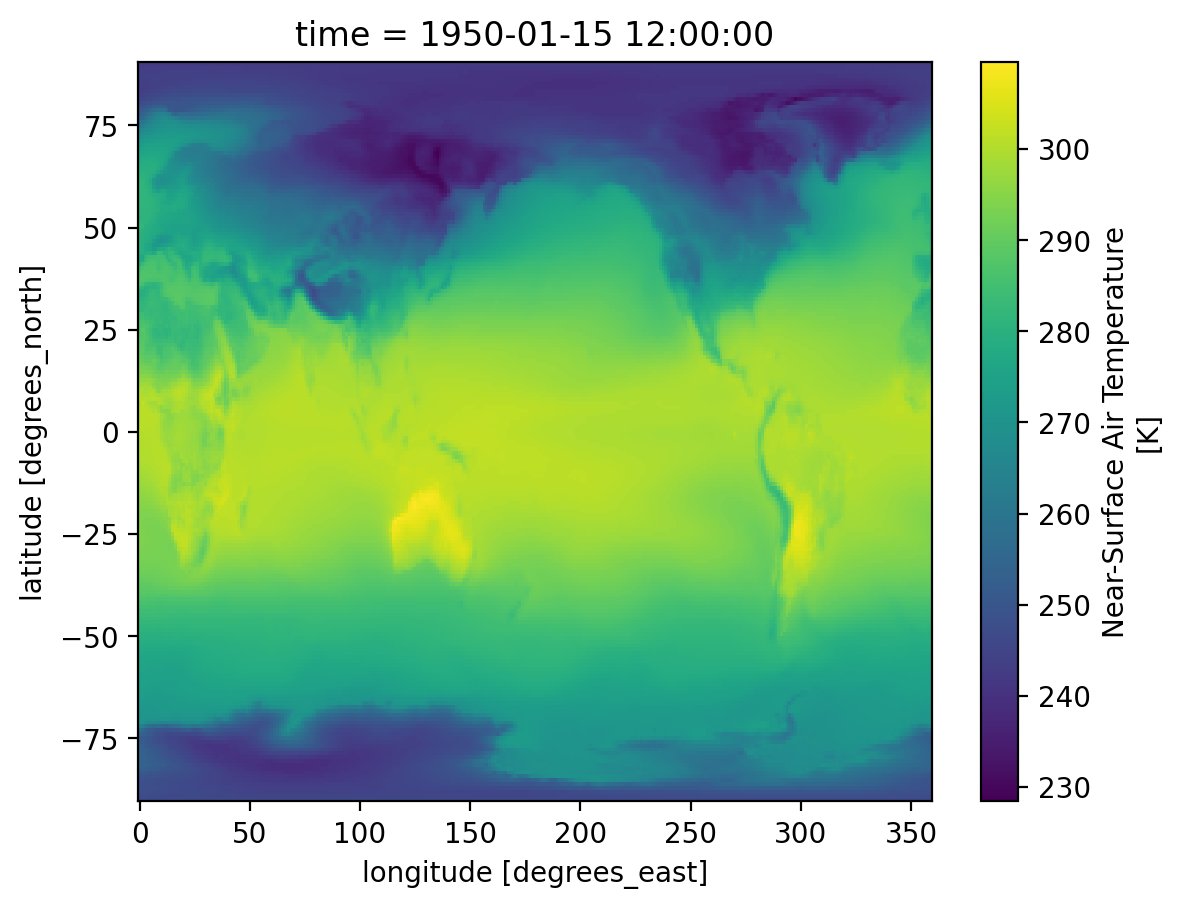

In [ ]:
ds.tas.sel(time='1950-01').squeeze().plot()  # Plot surface temperature for one time step

In [ ]:
df_area = df.query("variable_id == 'areacella' & source_id == 'CESM2'")  # Get area of model grid cells for entire globe
zstore = df_area.zstore.values[0]  # get the path to a specific zarr store (the first one from the dataframe above)
ds_area = xr.open_dataset(
    zstore,
    engine='zarr',
    backend_kwargs={'storage_options': {'token': 'anon'}},
    consolidated=True
)
ds_area

<xarray.Dataset> Size: 229kB
Dimensions:    (lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float32 2kB ...
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 2kB ...
Dimensions without coordinates: nbnd
Data variables:
    areacella  (lat, lon) float32 221kB ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          no parent
    branch_time_in_child:   711385.0
    branch_time_in_parent:  0.0
    case_id:                38
    ...                     ...
    table_id:               fx
    tracking_id:            hdl:21.14100/23fa9dc3-4f8f-4943-b99b-58eb804c06f0
    variable_id:            areacella
    variant_info:           f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001 
\n
\...
    variant_label:          r1i1p1f1
    status:                 2019-11-04;created;by nhn2@columbia.edu

In [ ]:
total_area = ds_area.areacella.sum(('lon', 'lat'))  # Calculate total area of grid cells
ta_timeseries = (ds.tas * ds_area.areacella).sum(('lon', 'lat')) / total_area  # Weigh data by grid cell area
ta_timeseries

<xarray.DataArray (time: 1980)> Size: 8kB
array([285.2367 , 285.49353, 286.10147, ..., 288.3483 , 287.31396,
       286.56613], dtype=float32)
Coordinates:
  * time     (time) object 16kB 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

Text(0.5, 1.0, 'Global Mean Surface Air Temperature')

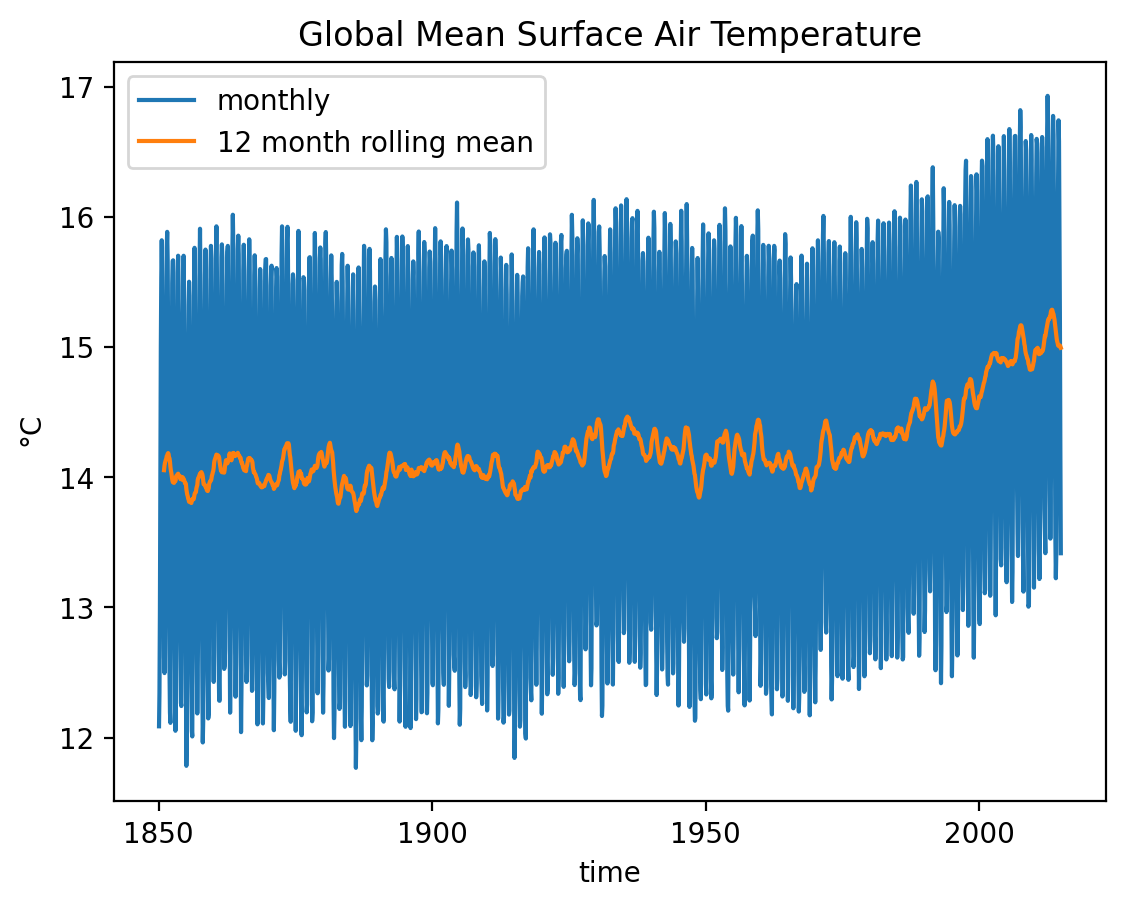

In [ ]:
(ta_timeseries-273.15).plot(label='monthly') # Plot globally averaged surface temp data
(ta_timeseries.rolling(time=12).mean()-273.15).plot(label='12 month rolling mean') # Plot rolling mean of data
plt.ylabel('$\degree$C')
plt.legend()
plt.title('Global Mean Surface Air Temperature')

## Plot area average and map for Illinois

In [ ]:
# lat=slice(south, north), lon=slice(west, east), note that longitude is in a 0-360 systrem!
total_area_IL = ds_area.areacella.sel(lat=slice(36, 43), lon=slice(-93+360, -86+360)).sum(('lon', 'lat'))
ta_timeseries_IL = (ds.tas * ds_area.areacella).sel(lat=slice(36, 43), lon=slice(-93+360, -86+360)).sum(('lon', 'lat')) / total_area_IL
ta_timeseries_IL

<xarray.DataArray (time: 1980)> Size: 8kB
array([270.29562, 273.40088, 280.0015 , ..., 294.3158 , 286.9534 ,
       278.28012], dtype=float32)
Coordinates:
  * time     (time) object 16kB 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

Text(0.5, 1.0, 'IL Mean Surface Air Temperature')

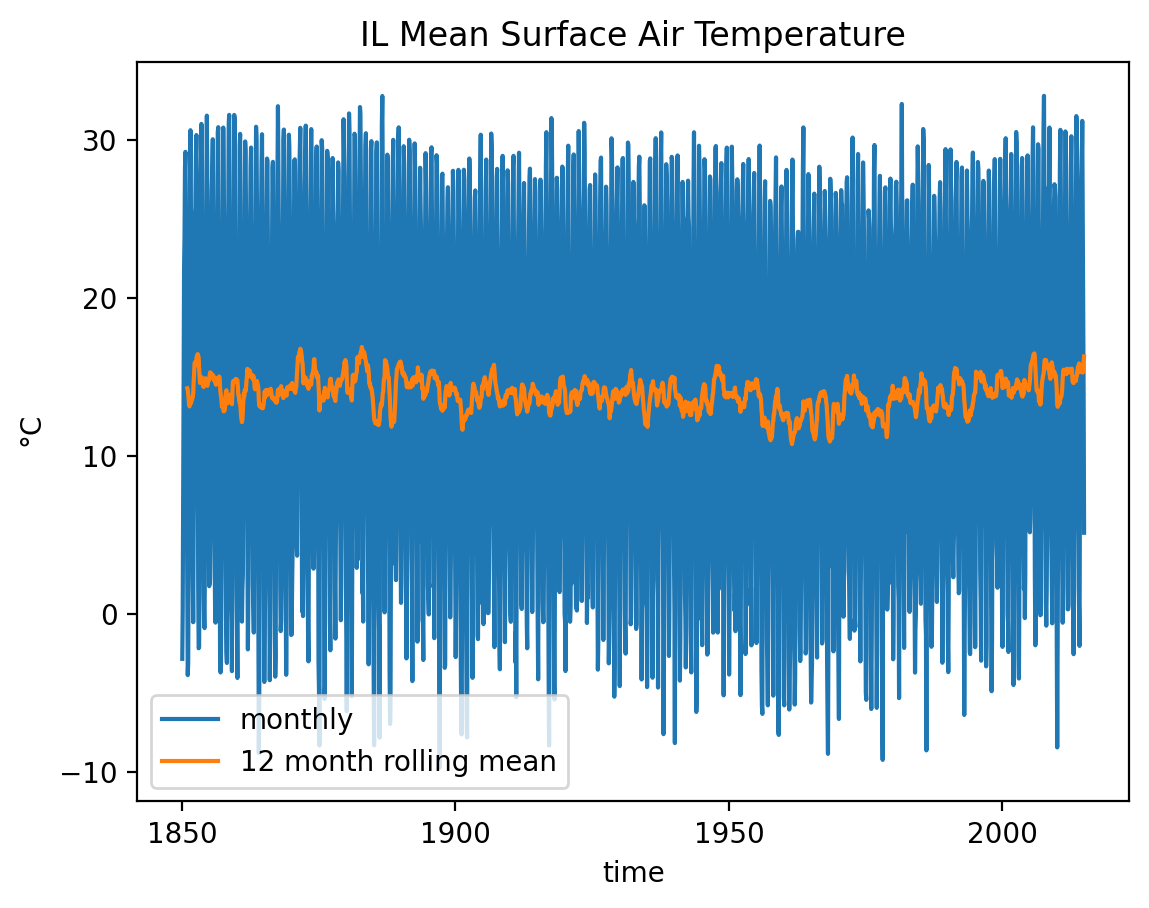

In [ ]:
(ta_timeseries_IL-273.15).plot(label='monthly')
(ta_timeseries_IL.rolling(time=12).mean()-273.15).plot(label='12 month rolling mean')
plt.ylabel('$\degree$C')
plt.legend()
plt.title('IL Mean Surface Air Temperature')

In [ ]:
np.save('/content/drive/MyDrive/CESM2_hist_tas.npy', ta_timeseries_IL.rolling(time=12).mean().values)

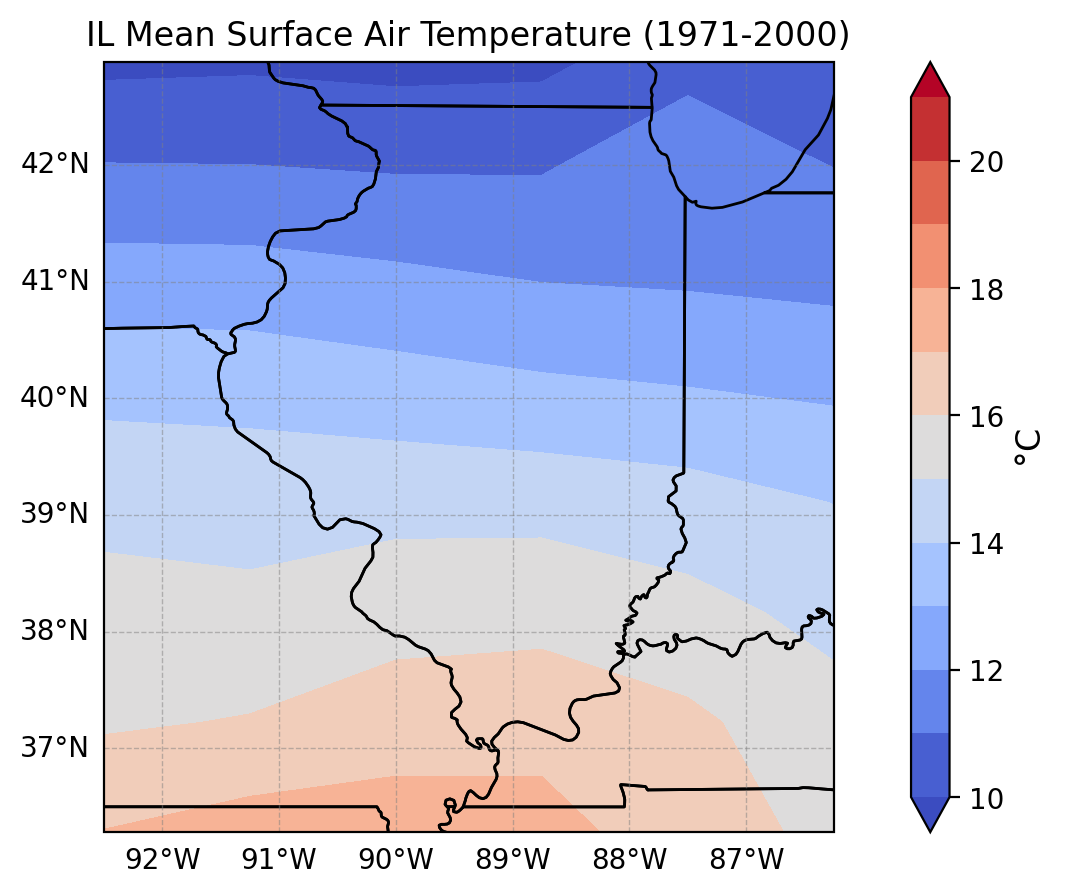

In [ ]:
var = ds.tas.sel(lat=slice(36, 43), lon=slice(-93+360, -86+360), time=slice('1971-01-15', '2000-12-15')).mean('time') - 273.15  # convert units from K to degree C

fig, axs = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 5))
# im = axs.contourf(var.lon, var.lat, var, cmap='coolwarm', extend='both')  # check the range of the colorbar
im = axs.contourf(var.lon, var.lat, var, levels=np.linspace(10, 21, 12), cmap='coolwarm', extend='both')
cbar = plt.colorbar(im)
cbar.set_label('$\degree$C', fontsize=12)
axs.set_title('IL Mean Surface Air Temperature (1971-2000)')

# Add map feature
axs.add_feature(cfeature.COASTLINE)
axs.add_feature(cfeature.BORDERS)
axs.add_feature(cfeature.STATES)

# Add gridlines
gl = axs.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Customize the tick labels
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Hide tick labels on top and right sides
gl.top_labels = False
gl.right_labels = False

plt.show()

In [ ]:
var.to_netcdf('/content/drive/MyDrive/CESM2_hist_tas.nc')

In [ ]:
# Plotting maps with xarray: https://mom6-analysiscookbook.readthedocs.io/en/latest/notebooks/Plotting.html
# Plotting maps with cartopy: https://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html
# Cartopy map examples: https://scitools.org.uk/cartopy/docs/latest/gallery/index.html